In [1]:
import math
import pandas as pd
import torch
import matplotlib.pyplot as plt
from   sklearn.model_selection import train_test_split
from   sklearn.compose import ColumnTransformer
from   sklearn.pipeline import Pipeline

from   sklearn.preprocessing import OneHotEncoder, StandardScaler
from   sklearn.linear_model import LogisticRegression
from   sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap

from src.DataLoader import CaltechBirdsDataset

C:\Users\ams90\.conda\envs\pytorch\python312.zip\config.ini


In [2]:
train_dict = pd.DataFrame()
dataset    = CaltechBirdsDataset(train=True)
birdloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
for data, images in birdloader:
    data_pd = pd.DataFrame(data)
    train_dict = pd.concat((train_dict, data_pd))

test_dict = pd.DataFrame()
testset    = CaltechBirdsDataset(train=False)
birdloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)
for data, images in birdloader:
    data_pd = pd.DataFrame(data)
    test_dict = pd.concat((test_dict, data_pd))

data_dict = pd.concat([train_dict, test_dict])


   

In [9]:
train_dict, test_dict =  train_test_split(data_dict, test_size=0.2, random_state=42)
X_train, y_train = train_dict.iloc[:, 8:], train_dict.iloc[:, 2]
X_test,  y_test  = test_dict.iloc[:, 8:],  test_dict.iloc[:, 2]
cats = list(data_dict)[8:]

In [10]:
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cats)])
model = Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['has_bill_shape',
                                                   'has_wing_color',
                                                   'has_upperparts_color',
                                                   'has_underparts_color',
                                                   'has_breast_pattern',
                                                   'has_back_color',
                                                   'has_tail_shape',
                                                   'has_upper_tail_color',
                                                   'has_head_pattern',
                                                   'has_breast_color',
                                                   'has_throat_color',
                                                   'has_eye_color',
                                                   'has_bill_length',
                                                   'has_forehead_color',
                                                   'has_under_tail_color',
                                                   'has_nape_color',
                                                   'has_belly_color',
                                                   'has_wing_shape', 'has_size',
                                                   'has_shape',
                                                   'has_back_pattern',
                                                   'has_tail_pattern',
                                                   'has_belly_pattern',
                                                   'has_primary_color',
                                                   'has_leg_color',
                                                   'has_bill_color',
                                                   'has_crown_color',
                                                   'has_wing_pattern'])])),
                ('classifier', LogisticRegression())])

In [11]:
test_dict

,trainset,file_name,class_id,one_hot,x,y,w,h,has_bill_shape,has_wing_color,...,has_size,has_shape,has_back_pattern,has_tail_pattern,has_belly_pattern,has_primary_color,has_leg_color,has_bill_color,has_crown_color,has_wing_pattern
5,0,090.Red_breasted_Merganser/Red_Breasted_Mergan...,90,89,156,81,292,161,5,1,...,3,3,99,99,99,1,99,10,1,3
26,0,085.Horned_Lark/Horned_Lark_0019_73996.jpg,85,84,139,135,174,145,7,5,...,4,6,3,3,0,5,11,0,11,3
3,1,068.Ruby_throated_Hummingbird/Ruby_Throated_Hu...,68,67,95,102,304,155,3,14,...,1,6,3,99,0,1,99,11,1,2
15,1,135.Bank_Swallow/Bank_Swallow_0062_129548.jpg,135,134,161,26,227,226,7,1,...,1,7,1,1,1,1,99,1,1,1
11,0,187.American_Three_toed_Woodpecker/American_Th...,187,186,119,40,216,447,1,11,...,1,8,3,0,0,11,5,5,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,1,072.Pomarine_Jaeger/Pomarine_Jaeger_0026_61273...,72,71,231,34,184,303,6,1,...,2,0,2,1,2,10,14,11,6,1
20,0,073.Blue_Jay/Blue_Jay_0079_62626.jpg,73,72,27,28,453,265,7,0,...,1,10,0,3,0,0,99,11,0,3
12,0,071.Long_tailed_Jaeger/Long_Tailed_Jaeger_0044...,71,70,40,75,366,160,5,1,...,0,3,1,0,99,1,99,11,5,1
31,0,077.Tropical_Kingbird/Tropical_Kingbird_0043_6...,77,76,137,53,223,213,6,5,...,1,13,3,2,3,5,5,11,5,3


In [12]:
y_pred = model.predict(X_test)
print('Accuracy on Training Data', round(model.score(X_train, y_train),2))
print('Accuracy on Testing Data ', round(model.score(X_test , y_test ),2))

Accuracy on Training Data 0.87
Accuracy on Testing Data  0.46


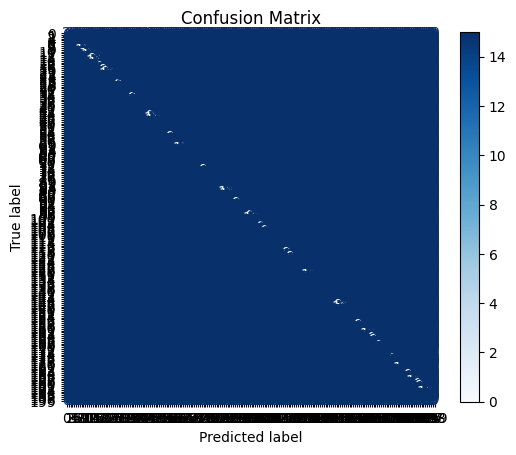

In [13]:
#Confusion Matrix is useless!
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [18]:
class_label = 92
class_idxs  = [i for i, class_id in enumerate(list(y_test)) if class_id == class_label]


In [19]:
for idx in class_idxs:
    print(idx, list(y_test)[idx], y_pred[idx], test_dict['file_name'].iloc[idx])

33 92 92 092.Nighthawk/Nighthawk_0084_84510.jpg
49 92 131 092.Nighthawk/Nighthawk_0054_795337.jpg
635 92 92 092.Nighthawk/Nighthawk_0070_82676.jpg
788 92 105 092.Nighthawk/Nighthawk_0088_82225.jpg
1117 92 92 092.Nighthawk/Nighthawk_0005_84594.jpg
1121 92 71 092.Nighthawk/Nighthawk_0022_84183.jpg
1248 92 123 092.Nighthawk/Nighthawk_0026_83911.jpg
1264 92 135 092.Nighthawk/Nighthawk_0030_795338.jpg
1346 92 159 092.Nighthawk/Nighthawk_0058_83270.jpg
1502 92 92 092.Nighthawk/Nighthawk_0027_84697.jpg
1698 92 92 092.Nighthawk/Nighthawk_0090_82579.jpg
1814 92 6 092.Nighthawk/Nighthawk_0041_82183.jpg
2019 92 19 092.Nighthawk/Nighthawk_0017_84237.jpg


In [20]:
X_sub = shap.sample(X_train, 1000)

In [21]:
ex = shap.Explainer(model.predict_proba, X_sub)
shap_values = ex(X_test.iloc[:500])

PermutationExplainer explainer: 501it [02:01,  3.91it/s]                         


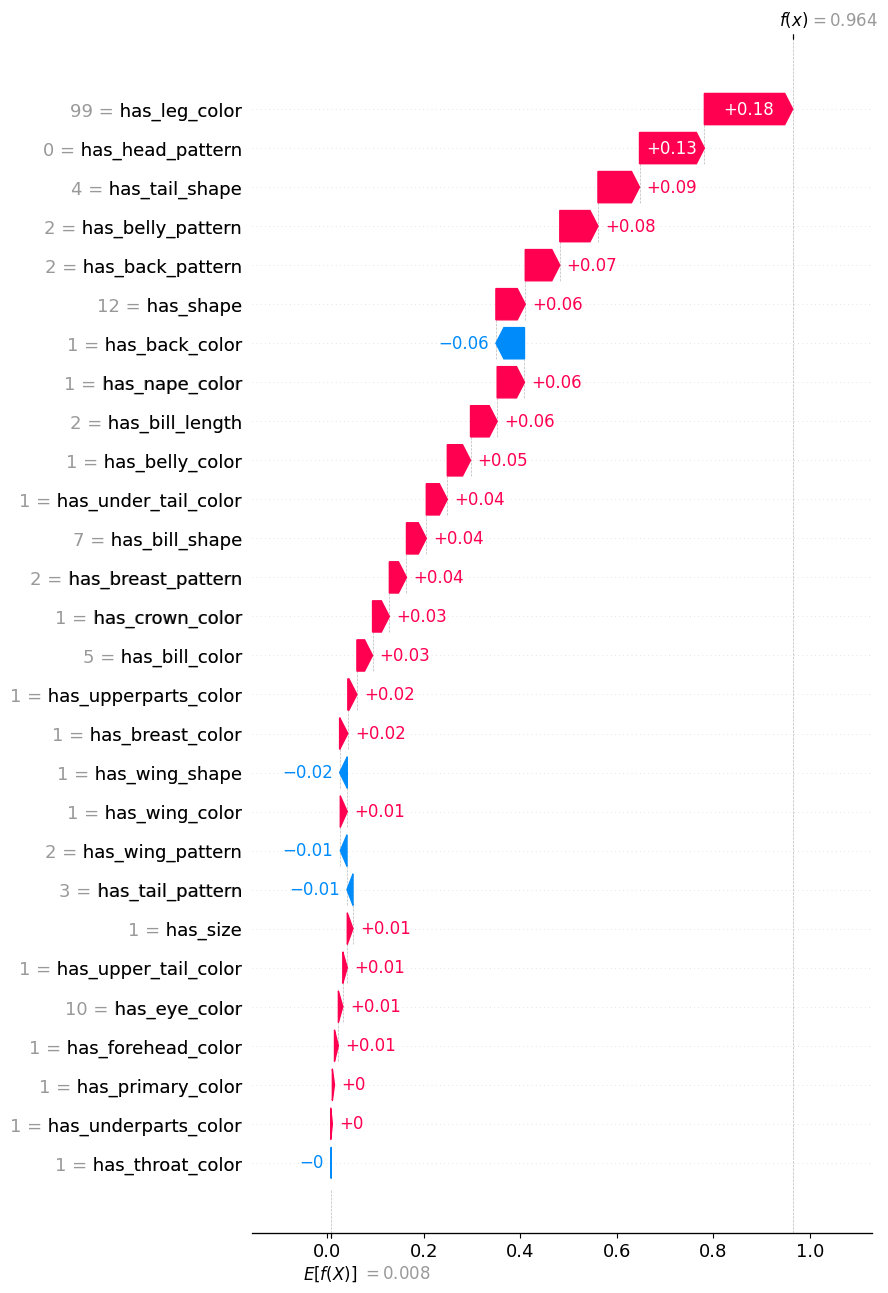

In [24]:
class_index, data_index = class_label -1, 33
shap.plots.waterfall(shap_values[data_index, :, class_index] , max_display=32, show=True)
#plt.savefig('waterfall.png')

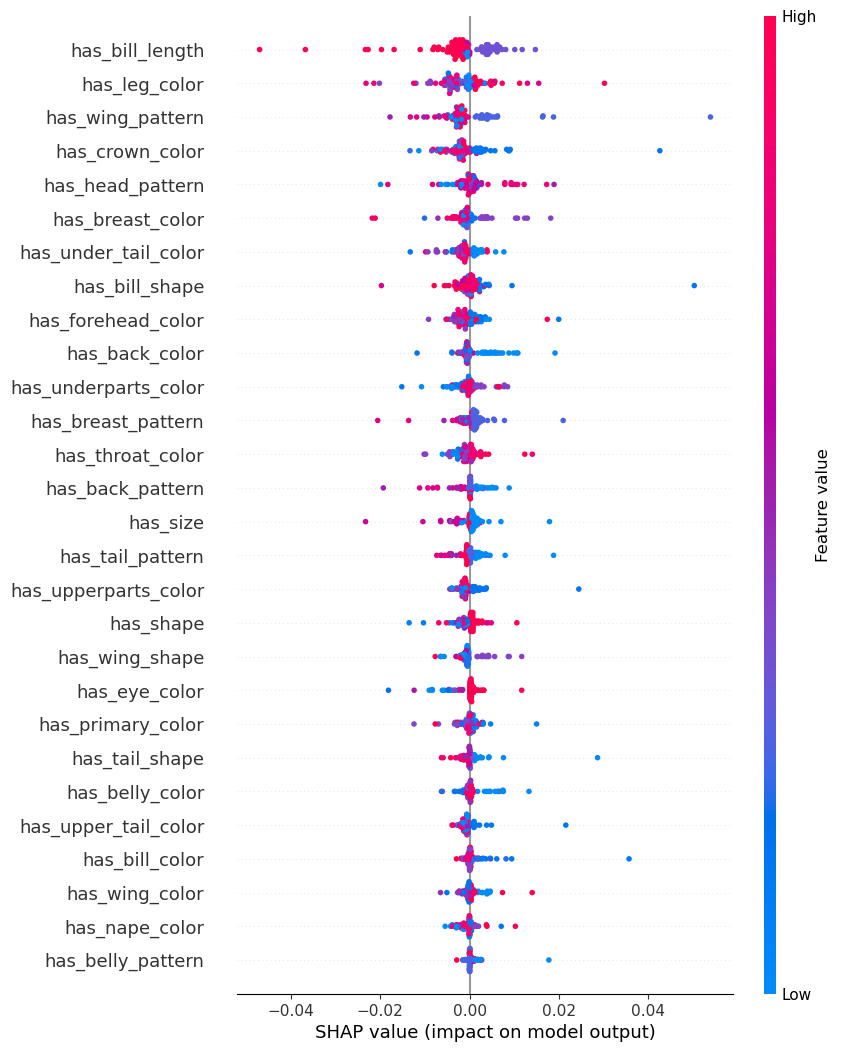

In [80]:
shap.plots.beeswarm(shap_values[:, :, class_index], max_display=32)

In [23]:
y_test.iloc[1]

79

In [24]:
y_pred[1]

193